# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
lat=[]
lng=[]
max_temp=[]
humidity=[]
clouds=[]
wind_speed=[]
country=[]
date=[]
city_name=[]

print("Beginning Data Retrieval")
print("------------------------------")
for i, city in enumerate(cities):
    url=f"http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID={weather_api_key}&q={city}&units=Imperial"
    response=requests.get(url)
    response_json=response.json()
    try:
        city_name.append(response_json["city"]["name"])
        lat.append(response_json["city"]["coord"]["lat"])
        lng.append(response_json["city"]["coord"]["lon"])
        country.append(response_json["city"]["country"])
        date.append(response_json["list"][0]["dt"])
        max_temp.append(response_json["list"][0]["main"]["temp_max"])
        humidity.append(response_json["list"][0]["main"]["humidity"])
        clouds.append(response_json["list"][0]["clouds"]["all"])
        wind_speed.append(response_json["list"][0]["wind"]["speed"])
        print(f"processing Record {i}|{city}")
    except (KeyError, IndexError):
        print(f"error processing, next {city}")
   

Beginning Data Retrieval
------------------------------
processing Record 0|bredasdorp
error processing, next saleaula
processing Record 2|vaini
processing Record 3|bajil
processing Record 4|vilhena
processing Record 5|rikitea
processing Record 6|saint-philippe
processing Record 7|new norfolk
processing Record 8|hermanus
processing Record 9|busselton
processing Record 10|hobart
processing Record 11|east london
error processing, next taolanaro
processing Record 13|bambous virieux
processing Record 14|castro
processing Record 15|georgetown
processing Record 16|atuona
processing Record 17|mataura
processing Record 18|weligama
processing Record 19|taoudenni
processing Record 20|alappuzha
processing Record 21|butaritari
processing Record 22|yellowknife
processing Record 23|ahuimanu
processing Record 24|basco
processing Record 25|bluff
processing Record 26|muyezerskiy
error processing, next belushya guba
error processing, next barentsburg
processing Record 29|jamestown
processing Record 30|e

processing Record 260|tepoztlan
error processing, next eskasem
processing Record 262|hofn
processing Record 263|sao joao da barra
processing Record 264|lincoln
processing Record 265|hambantota
error processing, next lolua
processing Record 267|gornopravdinsk
processing Record 268|simao
processing Record 269|andra
processing Record 270|grand gaube
processing Record 271|jurm
processing Record 272|linhai
processing Record 273|poum
processing Record 274|chapais
processing Record 275|halifax
processing Record 276|sao gabriel
processing Record 277|cockburn town
processing Record 278|hasaki
processing Record 279|alice springs
processing Record 280|marsa matruh
processing Record 281|balkhash
processing Record 282|terekli-mekteb
error processing, next zhaocheng
processing Record 284|opuwo
error processing, next ruatoria
processing Record 286|prince rupert
processing Record 287|hamilton
processing Record 288|merauke
processing Record 289|thompson
processing Record 290|filadelfia
processing Recor

processing Record 522|trinidad
processing Record 523|ambovombe
processing Record 524|mitu
processing Record 525|ouesso
processing Record 526|tuatapere
processing Record 527|auki
processing Record 528|eufaula
processing Record 529|massakory
processing Record 530|abapo
error processing, next aflu
processing Record 532|salalah
processing Record 533|tornio
processing Record 534|los llanos de aridane
processing Record 535|diamantino
processing Record 536|soyo
processing Record 537|gongzhuling
processing Record 538|cobija
processing Record 539|gao
processing Record 540|sunyani
processing Record 541|constantine
processing Record 542|esso
processing Record 543|marawi
processing Record 544|bozuyuk
processing Record 545|gushikawa
processing Record 546|dwarka
processing Record 547|acoyapa
error processing, next ilinsko-podomskoye
processing Record 549|progreso
error processing, next karamea
error processing, next bac can
processing Record 552|gaoual
processing Record 553|puri
processing Record 55

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_dict= ({"City":city_name,
              "Country":country,
              "Date": date,
              "Lat":lat,
              "Lng": lng,
              "Max Temperature": max_temp,
              "Humidity":humidity,
              "Cloudiness":clouds,
              "Wind Speed":wind_speed})
weather_data=pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Date,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,1605225600,-34.5322,20.0403,64.83,71,5,3.27
1,Vaini,TO,1605225600,-21.2000,-175.2000,79.61,82,52,14.83
2,Bajil,YE,1605225600,15.0584,43.2851,79.45,66,5,3.96
3,Vilhena,BR,1605225600,-12.7406,-60.1458,77.07,74,50,2.71
4,Rikitea,PF,1605225600,-23.1203,-134.9692,74.41,76,98,15.86


In [14]:
weather_data.describe()   

,Date,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed
count,5.740000e+02,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,1.605226e+09,20.558908,15.123861,57.109373,73.257840,52.290941,7.427491
std,0.000000e+00,32.741891,90.564847,23.625200,18.350944,37.295022,5.452113
min,1.605226e+09,-54.800000,-175.200000,-15.480000,12.000000,0.000000,0.340000
25%,1.605226e+09,-7.462000,-65.051725,41.067500,66.000000,15.000000,3.605000
50%,1.605226e+09,26.473250,18.470750,64.445000,78.000000,51.000000,6.320000
75%,1.605226e+09,46.664600,95.182725,76.735000,86.000000,90.000000,9.565000
max,1.605226e+09,77.484000,178.416700,96.600000,99.000000,100.000000,38.340000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#  Get the indices of cities that have humidity over 100%.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

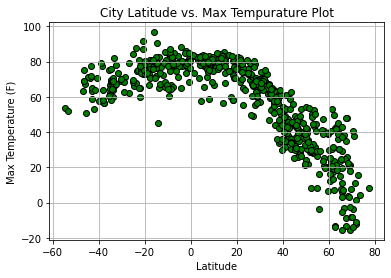

In [17]:
plt.scatter(weather_data["Lat"],weather_data["Max Temperature"], marker="o",facecolor='g', color='k')
plt.title("City Latitude vs. Max Tempurature Plot")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Humidity Plot

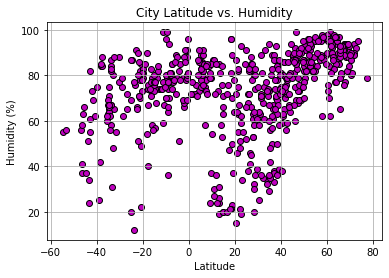

In [18]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"], marker="o", color='k',facecolor='m')
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Cloudiness Plot

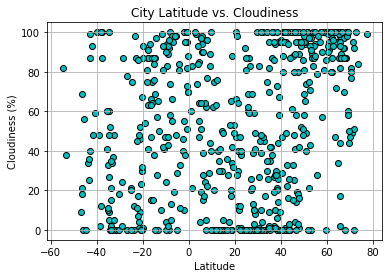

In [19]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"], marker="o", color='k',facecolor='c')
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Wind Speed Plot

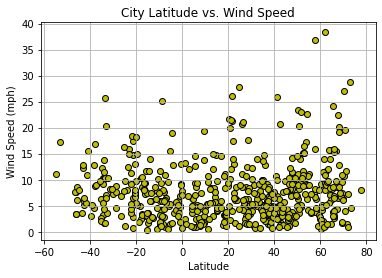

In [31]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"], marker="o", color='k',facecolor='y')
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

## Linear Regression

In [21]:
#Northern Hemisphere DF
weather_nhemp=weather_data[weather_data["Lat"]>0]
weather_nhemp

,City,Country,Date,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed
2,Bajil,YE,1605225600,15.0584,43.2851,79.45,66,5,3.96
13,George Town,MY,1605225600,5.4112,100.3354,78.75,89,51,4.03
16,Weligama,LK,1605225600,5.9667,80.4167,77.22,86,90,2.35
17,Taoudenni,ML,1605225600,22.6783,-3.9836,76.10,19,38,12.93
18,Alappuzha,IN,1605225600,9.4900,76.3264,78.73,81,89,1.72
...,...,...,...,...,...,...,...,...,...
566,Koupéla,BF,1605225600,12.1794,-0.3517,76.91,24,76,8.30
568,Āgaro,ET,1605225600,7.8500,36.6500,58.82,72,22,1.28
569,Novyye Burasy,RU,1605225600,52.1324,46.0714,29.73,89,75,10.25
570,Nuevo Casas Grandes,MX,1605225600,30.4167,-107.9167,67.75,25,27,5.23


In [22]:
#Southern Hemisphere DF
weather_shemp=weather_data[weather_data["Lat"]<0]
weather_shemp

,City,Country,Date,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,1605225600,-34.5322,20.0403,64.83,71,5,3.27
1,Vaini,TO,1605225600,-21.2000,-175.2000,79.61,82,52,14.83
3,Vilhena,BR,1605225600,-12.7406,-60.1458,77.07,74,50,2.71
4,Rikitea,PF,1605225600,-23.1203,-134.9692,74.41,76,98,15.86
5,Saint-Philippe,RE,1605225600,-21.3585,55.7679,73.89,71,1,6.40
...,...,...,...,...,...,...,...,...,...
562,Yulara,AU,1605225600,-25.2406,130.9889,84.51,20,0,16.35
565,Belém de São Francisco,BR,1605225600,-8.7539,-38.9658,87.13,36,2,25.08
567,Fare,PF,1605225600,-16.7000,-151.0167,80.53,74,94,9.40
572,Vaitape,PF,1605225600,-16.5167,-151.7500,80.71,71,63,8.08


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7754171345689864


Text(10, 5, 'y=-1.11x+92.83')

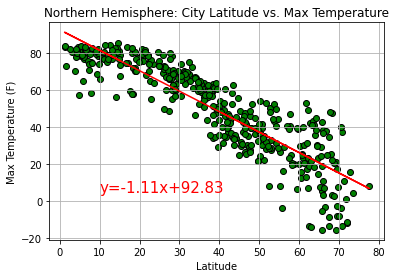

In [23]:
plt.scatter(weather_nhemp["Lat"],weather_nhemp["Max Temperature"], marker="o", color='k',facecolor='g')
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#Line Regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_nhemp["Lat"],weather_nhemp["Max Temperature"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_nhemp["Lat"]*slope + intercept
plt.plot(weather_nhemp["Lat"],regress_val, "r-")
r_square=rvalue**2
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (10,5), fontsize=15, color="r")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7754171345689864


Text(-50, 90, 'y=0.37x+81.0')

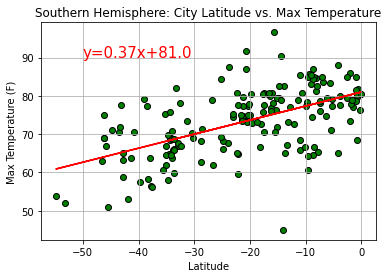

In [24]:
plt.scatter(weather_shemp["Lat"],weather_shemp["Max Temperature"], marker="o", color='k',facecolor='g')
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_shemp["Lat"],weather_shemp["Max Temperature"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_shemp["Lat"]*slope + intercept
plt.plot(weather_shemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (-50,90), fontsize=15, color="r")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.7754171345689864


Text(50, 20, 'y=0.44x+56.98')

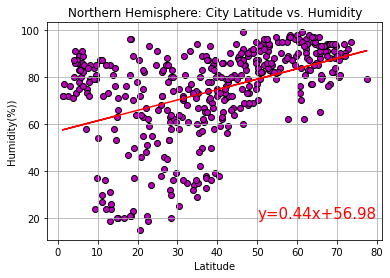

In [25]:
plt.scatter(weather_nhemp["Lat"],weather_nhemp["Humidity"], marker="o", color='k',facecolor='m')
plt.title("Northern Hemisphere: City Latitude vs. Humidity")
plt.ylabel("Humidity(%))")
plt.xlabel("Latitude")
plt.grid(True)
#linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_nhemp["Lat"],weather_nhemp["Humidity"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_nhemp["Lat"]*slope + intercept
plt.plot(weather_nhemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (50,20), fontsize=15, color="r")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.7754171345689864


Text(-55, 35, 'y=0.49x+81.68')

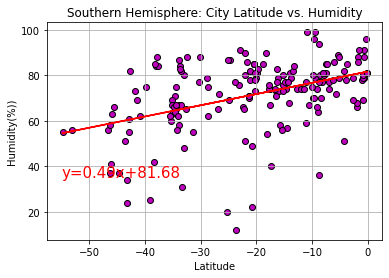

In [26]:
plt.scatter(weather_shemp["Lat"],weather_shemp["Humidity"], marker="o", color='k',facecolor='m')
plt.title("Southern Hemisphere: City Latitude vs. Humidity")
plt.ylabel("Humidity(%))")
plt.xlabel("Latitude")
plt.grid(True)
#linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_shemp["Lat"],weather_shemp["Humidity"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_shemp["Lat"]*slope + intercept
plt.plot(weather_shemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (-55,35), fontsize=15, color="r")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.7754171345689864


Text(50, 25, 'y=0.76x+24.55')

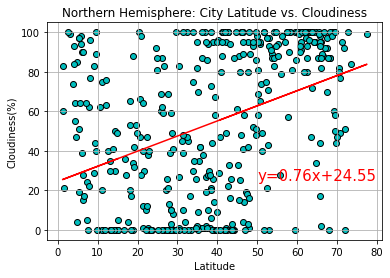

In [27]:
plt.scatter(weather_nhemp["Lat"],weather_nhemp["Cloudiness"], marker="o", color='k',facecolor='c')
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
#linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_nhemp["Lat"],weather_nhemp["Cloudiness"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_nhemp["Lat"]*slope + intercept
plt.plot(weather_nhemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (50,25), fontsize=15, color="r")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.7754171345689864


Text(-56, 10, 'y=0.68x+62.29')

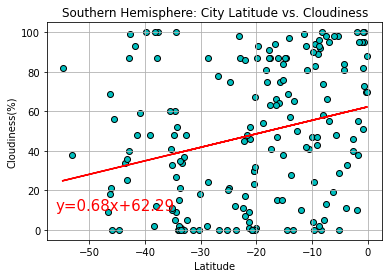

In [28]:
plt.scatter(weather_shemp["Lat"],weather_shemp["Cloudiness"], marker="o", color='k',facecolor='c')
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
#linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_shemp["Lat"],weather_shemp["Cloudiness"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_shemp["Lat"]*slope + intercept
plt.plot(weather_shemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (-56,10), fontsize=15, color="r")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.7754171345689864


Text(0, 30, 'y=0.05x+5.67')

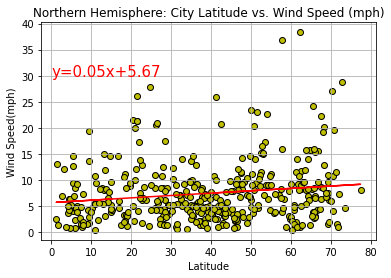

In [29]:
plt.scatter(weather_nhemp["Lat"],weather_nhemp["Wind Speed"], marker="o", color='k',facecolor='y')
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
#linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_nhemp["Lat"],weather_nhemp["Wind Speed"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_nhemp["Lat"]*slope + intercept
plt.plot(weather_nhemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (0,30), fontsize=15, color="r")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.7754171345689864


Text(-55, 22, 'y=-0.07x+5.98')

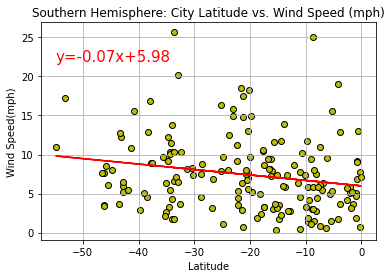

In [30]:
plt.scatter(weather_shemp["Lat"],weather_shemp["Wind Speed"], marker="o", color='k',facecolor='y')
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
#linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_shemp["Lat"],weather_shemp["Wind Speed"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_shemp["Lat"]*slope + intercept
plt.plot(weather_shemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (-55,22), fontsize=15, color="r")
